In [29]:
# Core
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import re, scipy as sp, scipy.stats

In [2]:
df=pd.read_csv("../data/clean_data.csv")

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df.describe()

,balance,credit_limit,available_amount,next_payment_amount,account,card,credit_card,insurance,investment,savings,current_liability,illiquid_asset,liquid_asset,asset,liability,budget_cut_weekly,wealth_growth,monthly_max_saving,budget_daily,feasible,budget_monthly,saved_amount,diff2target,monthly_min_expense,completion_rate,budget_cut_monthly,difficulty_idx,delta,monthly_avg_income,amount_bgt,budget_cut_daily,current_goal_budget_cut_by_day,budget_weekly,Others_weekly,Others_monthly,Others_daily,Leisure_weekly,Leisure_monthly,Leisure_daily,Transportation_weekly,Transportation_monthly,Transportation_daily,Financials_weekly,Financials_monthly,Financials_daily,Dining & Beverage_weekly,Dining & Beverage_monthly,Dining & Beverage_daily,Healthcare_weekly,Healthcare_monthly,Healthcare_daily,Shopping_weekly,Shopping_monthly,Shopping_daily,Home_weekly,Home_monthly,Home_daily,Completed,Failed,In progress,Dining_bgt,Education_bgt,Healthcare_bgt,Home_bgt,Leisure_bgt,Property_bgt,Saving,amount,Dining & Beverage,Financials,Healthcare,Home,Leisure,Others,Shopping,Transportation
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,46315.608337,38327.894328,10611.947803,150.487989,2614.372909,994.285369,-3076.197472,1837.920000,819.528205,43125.699326,-3076.198668,1837.920000,47553.887005,49391.807005,-3076.198668,8.170336e+05,8.992012,1027.329288,-116640.596500,0.300934,-3.499218e+06,116487.203626,134614.455029,1452.471981,0.255101,3.501698e+06,6.881221,66.834168,2479.801269,9.189419e+05,116723.256543,116712.488848,-8.164842e+05,37.847542,162.203752,5.406792,20.233736,86.716009,2.890534,14.948923,64.066813,2.135560,331.436026,1420.440113,47.348004,2.393052e+01,102.559392,3.418646e+00,0.138685,0.594366,0.019812,33.959931,145.542561,4.851419,1.124908,4.821034,0.160701,0.214207,0.090236,0.695557,0.158059,0.192389,0.062180,0.049873,0.067525,0.062180,0.407794,-16698.842559,-2750.950117,6348.494015,-2691.782751,-110.979021,-3234.842774,-9225.235664,-3472.610769,-1560.935478
std,139156.502507,89613.658548,32256.406784,445.133280,9986.262394,4163.392344,7010.857262,9772.476145,6216.795999,138090.884918,7010.857168,9772.476145,138077.603252,138275.118751,7010.857168,1.662774e+06,18.361450,3765.166187,237542.045340,0.247382,7.126261e+06,237668.980209,235316.441470,2177.285913,0.208506,7.126117e+06,2.724353,37.934992,3079.453971,1.837467e+06,237537.230020,237542.192175,1.662794e+06,56.454533,241.948001,8.064933,39.505939,169.311169,5.643706,29.187455,125.089093,4.169636,357.070040,1530.300170,51.010006,4.672384e+01,200.245037,6.674835e+00,0.270761,1.160403,0.038680,66.286420,284.084659,9.469489,2.196359,9.412966,0.313766,0.180904,0.184419,0.337687,0.243202,0.367035,0.124826,0.097376,0.194649,0.124826,0.393999,40992.713025,8371.183188,58438.282944,11265.116326,341.877269,9432.403674,18390.599821,10626.601999,4575.258766
min,-39872.220000,0.000000,0.000000,0.000000,0.000000,-0.070000,-39872.220000,0.000000,0.000000,0.000000,-39872.220000,0.000000,0.000000,0.000000,-39872.220000,1.822800e-02,0.000000,-6556.870544,-644426.591450,0.000000,-1.933280e+07,0.000000,181.452410,51.812900,0.000000,7.812000e-

In [ ]:
df.info()

In [23]:
# add the net worth attribute(note:liability is negetive)
df['net worth']=df['asset']+df['liability']
target=df['net worth']

#### Find Outliers

Visualisation of data may support the discovery of possible outliers within the data. Examples of how this can be done include:

1. Within univariate analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)

2. Within bivariate analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.

The consensus is that all outliers should be carefully examined:

- Go back to original data to check for recording or transcription errors

- If no such errors, look carefully for unusual features of the individual unit to explain difference. This may lead to new theory/discoveries

- If data cannot be checked further, outlier is usually (often) dropped from the dataset.

The scatterplots of Sold Price against each numerical attribute is shown below, with the aim of employing method 2 above with bivariate analysis.

/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

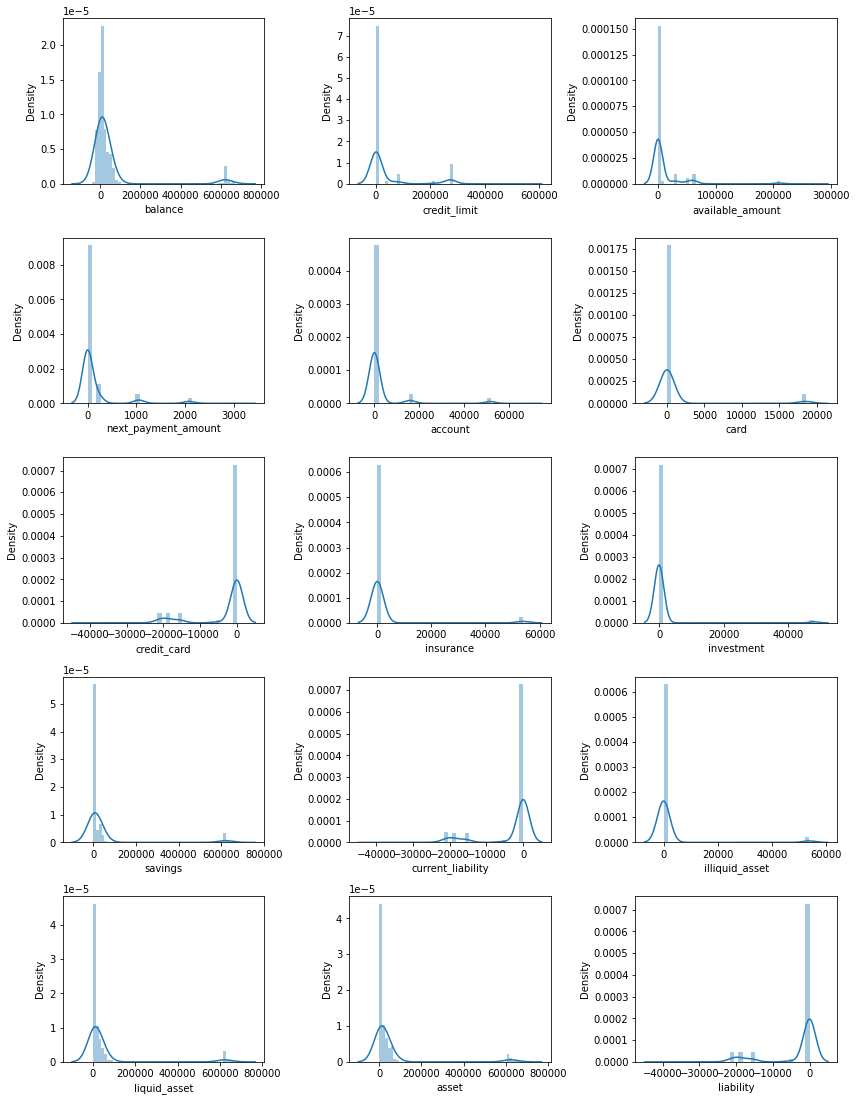

In [19]:
num_attributes=df.select_dtypes(exclude='object')

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(6,3,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna().round(decimals=2))
    plt.xlabel(num_attributes.columns[i])
    if i==14:
        break

plt.tight_layout()
plt.show()

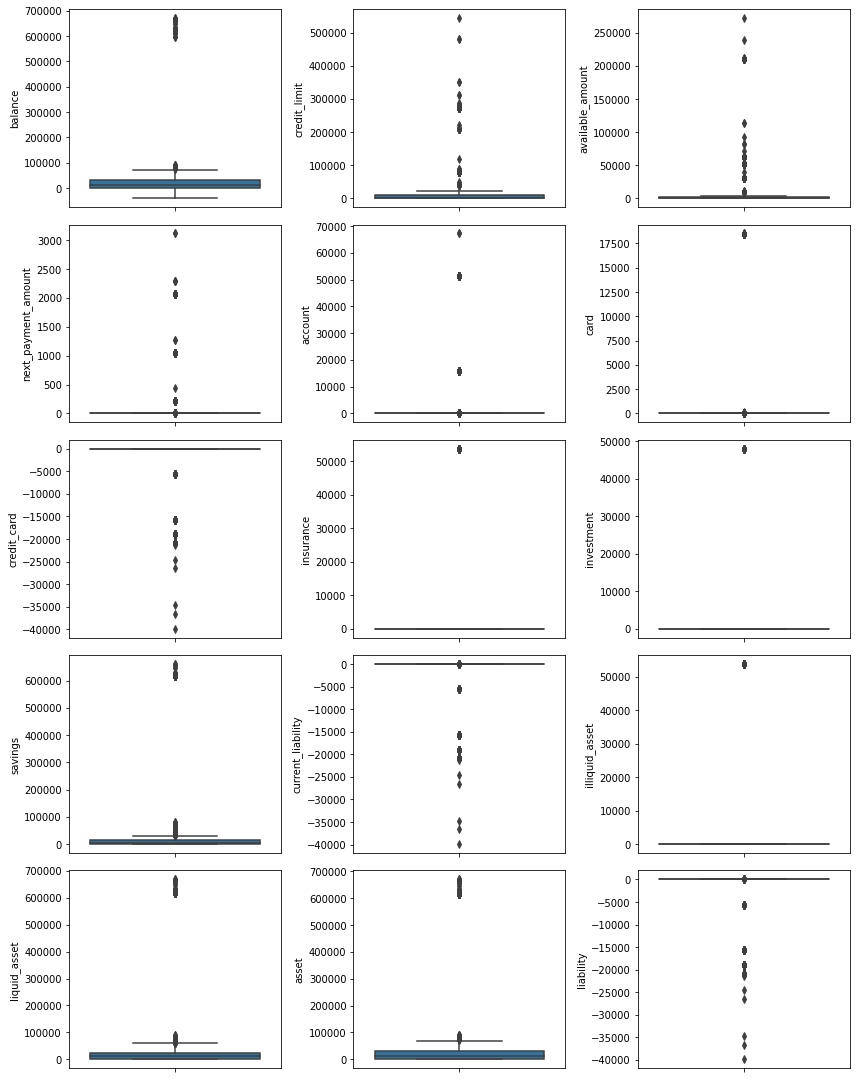

In [15]:
# Take 15 num_attributes as example
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(6, 3, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])
    if i==14:
        break

plt.tight_layout()
plt.show()

/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangzhiyuan/opt/anaconda3/envs/bert/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

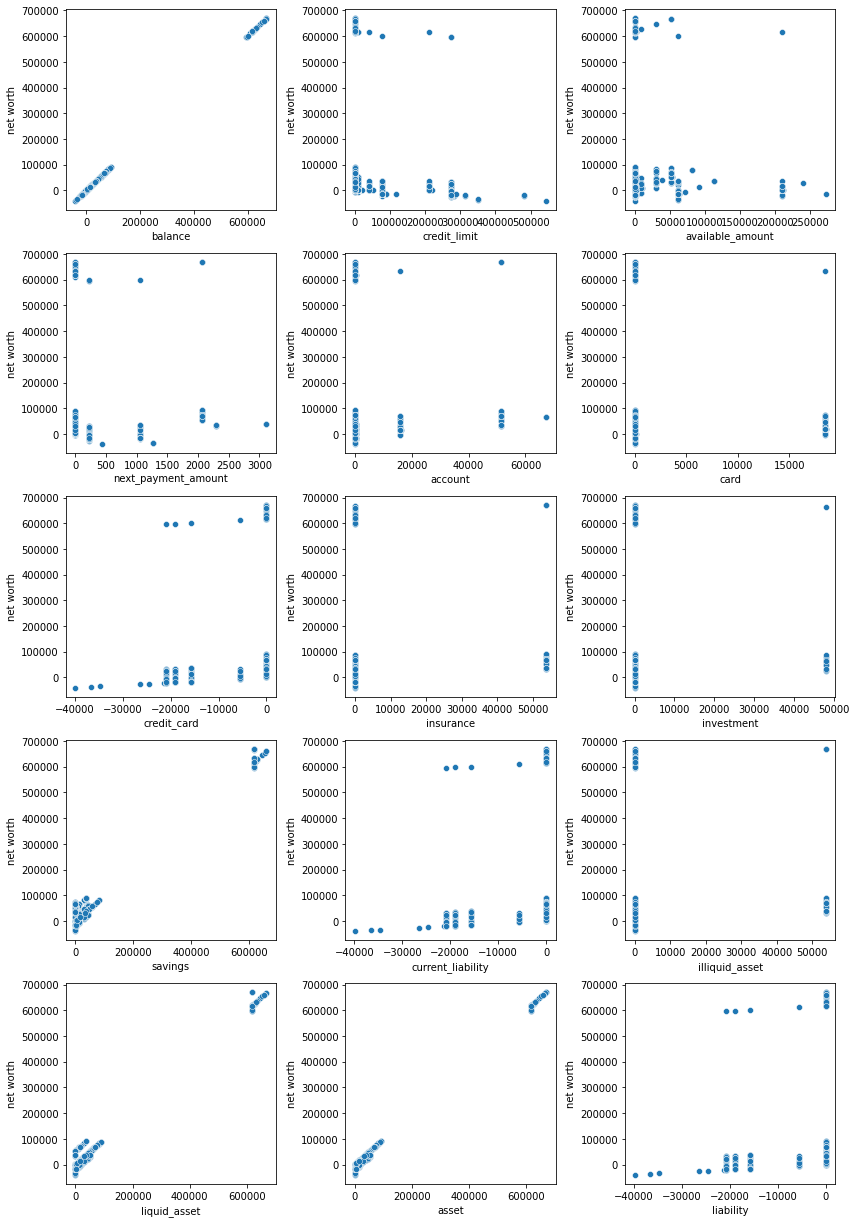

In [24]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(6, 3, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    if i==14:
        break
        
plt.tight_layout()
plt.show()

In [32]:
#Removing Outliers Based on Z-score
df = df[(np.abs(sp.stats.zscore(df['balance']))<3) & (np.abs(sp.stats.zscore(df['current_liability']))<5)]

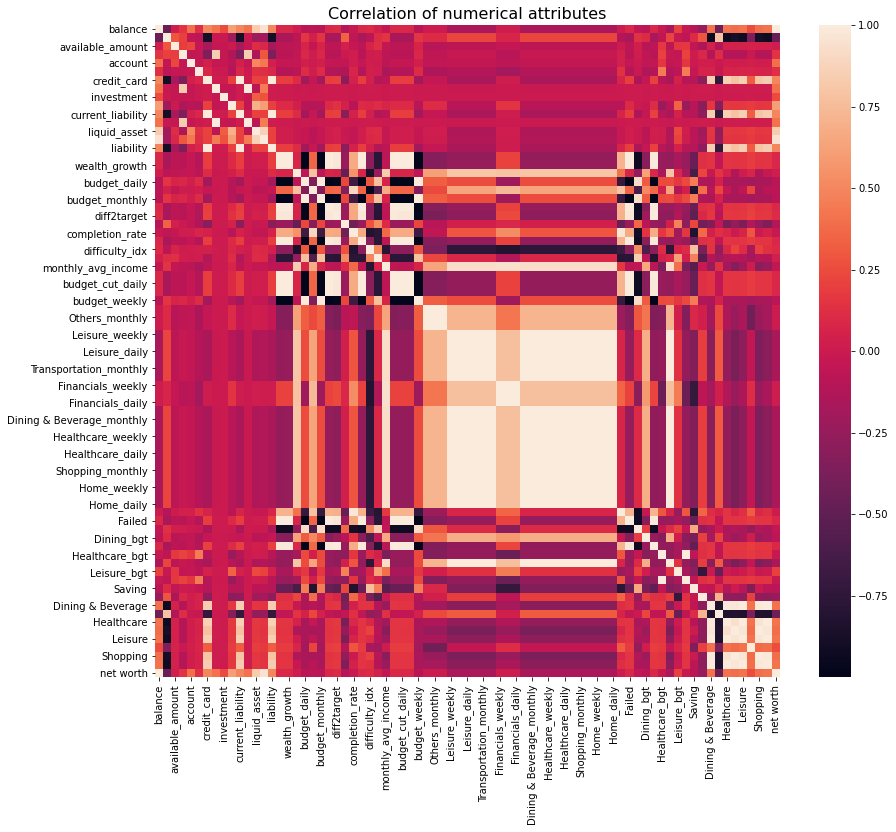

In [34]:
correlation = df.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [37]:
correlation['net worth'].sort_values(ascending=False)

balance             1.000000
net worth           1.000000
asset               0.948243
liquid_asset        0.830136
savings             0.603785
                      ...   
Shopping_monthly   -0.155073
Shopping_daily     -0.155073
amount             -0.246017
Financials         -0.444672
credit_limit       -0.458379
Name: net worth, Length: 77, dtype: float64

In [ ]:
df.drop(['balance','Shopping_monthly','Shopping_daily','Financials','credit_limit'],axis=1,inplace=True)

In [47]:
'''
As the net worth is the sum of asset and liablity, 
 drop the asset and liablity and use other attributes to do the prediction
'''
df.drop(['asset','liability'],axis=1,inplace=True)

In [48]:
df.to_csv("clean_data2.csv")